In [ ]:
! git clone https://github.com/Gurupatil0003/Waste-Mangement-Dataset

fatal: destination path 'Waste-Mangement-Dataset' already exists and is not an empty directory.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
train="/content/Waste-Mangement-Dataset/Data/Train"
test="/content/Waste-Mangement-Dataset/Data/Test"

In [ ]:
train_generator=ImageDataGenerator(rescale=1/255)
train_generator=train_generator.flow_from_directory(
    train,
    target_size=(300,300),
    batch_size=32,
    class_mode="sparse"
    )

Found 2186 images belonging to 6 classes.


In [ ]:
labels=train_generator.class_indices
labels=dict((v,k) for k, v in labels.items())
labels

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [ ]:
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(
    test,
    target_size=(300,300),
    batch_size=32,
    class_mode="sparse"
    )

Found 343 images belonging to 6 classes.


# Model building

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3), padding="same", input_shape=(300,300,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))  #MaxPooling2D(2,2) also same

model.add(Conv2D(64,kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="softmax"))

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model.fit(train_generator,epochs=10,steps_per_epoch=2186 // 32)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.2042 - loss: 1.7919
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 192us/step - accuracy: 0.3125 - loss: 1.7089
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


68/68 ━━━━━━━━━━━━━━━━━━━━ 316s 5s/step - accuracy: 0.3139 - loss: 1.6293
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 196us/step - accuracy: 0.3438 - loss: 1.4554
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 315s 5s/step - accuracy: 0.4379 - loss: 1.4257
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 194us/step - accuracy: 0.4375 - loss: 1.3109
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - accuracy: 0.4883 - loss: 1.2828
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 193us/step - accuracy: 0.6562 - loss: 0.7550
Epoch 9/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 331s 5s/step - accuracy: 0.5344 - loss: 1.1564
Epoch 10/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 186us/step - accuracy: 0.6250 - loss: 1.0518


In [ ]:
model.save("waste.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
probability 0.870166
paper


Text(0.5, 1.0, 'loading')

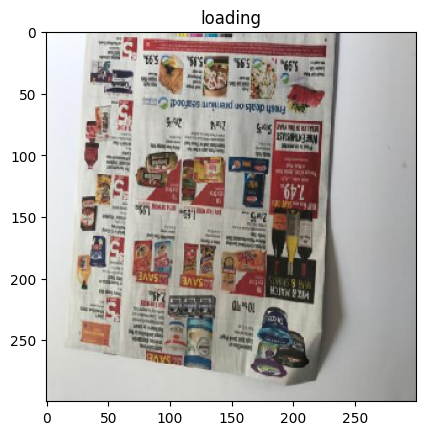

In [144]:
import matplotlib.pyplot as plt
import keras.utils as ku
import numpy as np

img_path="/content/Waste-Mangement-Dataset/Data/Test/paper/paper512.jpg"
img=ku.load_img(img_path,target_size=(300,300))
img=ku.img_to_array(img)
img=np.array(img)/255.0
prediction=model.predict(img[np.newaxis,...])
print("probability",np.max(prediction[0],axis=-1))

cl=labels[np.argmax(prediction[0],axis=-1)]
print(cl)

plt.imshow(np.squeeze(img))
plt.title("loading")

In [ ]:
for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),":",round(j*100,2),"%")

CARDBOARD : 17.91 %
GLASS : 15.76 %
METAL : 15.23 %
PAPER : 18.54 %
PLASTIC : 15.3 %
TRASH : 17.27 %


In [147]:
from tensorflow.keras.models import load_model
import gradio as gr
import tensorflow as tf
import numpy as np

In [148]:
model=load_model("/content/_waste.h5")

In [149]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)              │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │     1,401,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,442,248 (5.50 MB)

 Trainable params: 1,442,246 (5.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [150]:
label=["cardboard","glass","metal","paper","plastic","trash"]

In [156]:
def analyze_im(image):
  image=tf.image.resize(image,[300,300])/255.0
  image=np.expand_dims(image,axis=0)
  prediction=model.predict(image)
  prediction_in=np.argmax(prediction[0])
  prediction_label=label[prediction_in]
  confidence=np.max(prediction[0])*100
  return prediction_label, f"{confidence:.2f}"

interface = gr.Interface(
    fn=analyze_im,
    inputs=gr.Image(label="upload image"),
    outputs=[
        gr.Label(num_top_classes=1,label="class"),
        gr.Text(label="confidence")
    ])
interface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1ca6ebaf33571212cb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [157]:
import gradio as gr
import tensorflow.keras.utils as ku
import numpy as np
from tensorflow.keras.models import load_model

# Load your model
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

# Core classification logic
def classify_image(image):
    img = ku.array_to_img(image).resize((300, 300))
    img_array = ku.img_to_array(img, dtype=np.uint8) / 255.0
    prediction = model.predict(img_array[np.newaxis, ...])[0]

    predicted_class = labels[np.argmax(prediction)]
    confidence = float(np.max(prediction))
    class_confidence = {label: float(prediction[i]) for i, label in enumerate(labels)}

    return predicted_class, f"{confidence * 100:.2f}%", class_confidence

# Fancy Gradio App
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown(
        """
        <div style='text-align: center;'>
            <h1 style='font-size: 2.5em; color: #4A90E2;'>🧠 Trash Classifier</h1>
            <p style='font-size: 1.2em;'>Upload an image of trash, and let our AI sort it into categories!</p>
            <p style='font-size: 1em; color: gray;'>Built with TensorFlow + Gradio</p>
        </div>
        """,
    )

    with gr.Row():
        with gr.Column(scale=1):
            image_input = gr.Image(label="📸 Upload Trash Image", type="numpy", image_mode="RGB")
            submit_button = gr.Button("🚀 Classify", elem_id="submit-button")
        with gr.Column(scale=2):
            result_label = gr.Label(label="🔖 Predicted Class")
            confidence_text = gr.Text(label="📊 Confidence of Top Class")
            confidence_bar = gr.HighlightedText(label="📌 Confidence Breakdown")

    # Logic for updating UI
    def predict_and_format(image):
        predicted_class, confidence, class_confidence = classify_image(image)
        formatted = [(label, f"{conf:.2%}") for label, conf in class_confidence.items()]
        highlighted = [(label, conf, "highlight" if label == predicted_class else None) for label, conf in formatted]
        return predicted_class, confidence, highlighted

    submit_button.click(
        fn=predict_and_format,
        inputs=image_input,
        outputs=[result_label, confidence_text, confidence_bar]
    )

    gr.Markdown(
        """
        <div style='text-align: center; margin-top: 30px;'>
            <p style='font-size: 1em; color: #999;'>🛠️ Tip: Use clear images for better classification accuracy</p>
            <p style='font-size: 0.9em; color: #ccc;'>© 2025 Trash Classifier AI</p>
        </div>
        """,
    )

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e0b3b300eaee948eef.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
